## 1.데이터 불러오기

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


### 1-1 그래프에 한글 폰트 적용하기 (colab에서 적용하기)
명령어 실행 후 런타임 다시 시작

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,383 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [2]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [3]:
# 데이터 출처 : https://github.com/bab2min/corpus/tree/master/sentiment

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt",
     filename="ratings_total.txt"
)

('ratings_total.txt', <http.client.HTTPMessage at 0x7f1b00dd8c90>)

In [4]:
!ls

gdrive	ratings_total.txt  sample_data


In [5]:
naver_review_df = pd.read_table('ratings_total.txt')
naver_review_df

,5,배공빠르고 굿
0,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
1,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
2,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
3,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
4,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
...,...,...
199994,2,장마라그런가!!! 달지않아요
199995,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199996,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199997,5,넘이쁘고 쎄련되보이네요~


### column 설정하여 데이터 불러오기

In [6]:
naver_review_df = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])
naver_review_df

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [7]:
naver_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


## 2.데이터 파악 및 전처리

### 2-1.긍부정 라벨 부여

In [8]:
naver_review_df['ratings'].unique()

array([5, 2, 1, 4])

### 리뷰 점수가 1, 2점인 경우 0으로 4, 5점인 경우 1로 변환
### 부정적인 리뷰 = 0, 긍정적인 리뷰 = 1

In [9]:
naver_review_df['ratings'].replace([1, 2, 4, 5], [0, 0, 1, 1], inplace=True)
naver_review_df

,ratings,reviews
0,1,배공빠르고 굿
1,0,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,1,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,0,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,1,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,0,장마라그런가!!! 달지않아요
199996,1,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,1,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,1,넘이쁘고 쎄련되보이네요~


### 2-2.중복제거

In [10]:
naver_review_df[naver_review_df.duplicated()].sort_values(by='reviews')

,ratings,reviews
10958,1,2022년까지 넉넉함
137154,0,3년 동안 꾸준히 쓰는데 좋아요
155806,1,가격에 비해 가성비 좋습니다
172758,0,가나다라마바사아자차카
118540,0,감사합니다 잘쓸께요
...,...,...
197220,0,정사이즈보다 조금더 크게시켜야할듯
195204,0,제품이 그냥 그냥 그래요~
73979,1,좋아보이네요~잘써보겠습니다~
177221,0,크기가 너무 작아요


In [11]:
naver_review_df[naver_review_df.duplicated(subset=['reviews'])].sort_values(by='reviews')

,ratings,reviews
10958,1,2022년까지 넉넉함
137154,0,3년 동안 꾸준히 쓰는데 좋아요
155806,1,가격에 비해 가성비 좋습니다
172758,0,가나다라마바사아자차카
118540,0,감사합니다 잘쓸께요
...,...,...
73979,1,좋아보이네요~잘써보겠습니다~
141349,1,크고 좋아요
177221,0,크기가 너무 작아요
184478,0,한사이즈 크게 주문하세요 스판기 없고 통풍 안됨


### reviews를 기준으로 중복 검사를 한 결과와 ratings, reviews를 기준으로 중복 검사를 한 결과가 다르다?!

In [12]:
review_standard = list(naver_review_df[naver_review_df.duplicated(subset=['reviews'])].index)
total_standard = list(naver_review_df[naver_review_df.duplicated()].index) 
except_list = []

for idx in review_standard:
    if idx not in total_standard:
        except_list.append(idx)

In [13]:
except_list

[63566, 77799, 84519, 85120, 111543, 141349, 163277, 164740, 195539, 196291]

In [14]:
naver_review_df.iloc[except_list[0]]

ratings                0
reviews    아직 잘 모르겠어요...
Name: 63566, dtype: object

In [15]:
naver_review_df.query('reviews == "아직 잘 모르겠어요..."')

,ratings,reviews
31363,1,아직 잘 모르겠어요...
63566,0,아직 잘 모르겠어요...


### reviews는 같지만 ratings이 다른 경우가 있다! 제거하기!

In [16]:
delete_idx = []

for idx in except_list:
    duplicated_review = naver_review_df.iloc[idx]['reviews']
    delete_idx.extend(list(naver_review_df.query(f'reviews == "{duplicated_review}"').index))

In [17]:
delete_idx

[31363,
 63566,
 33598,
 77799,
 31569,
 84519,
 22365,
 85120,
 77089,
 111543,
 17575,
 141349,
 46871,
 163277,
 110232,
 164740,
 31088,
 195539,
 172462,
 196291]

In [18]:
naver_review_df.drop(delete_idx, inplace=True)
naver_review_df.reset_index(drop=True, inplace=True)
naver_review_df

,ratings,reviews
0,1,배공빠르고 굿
1,0,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,1,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,0,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,1,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199975,0,장마라그런가!!! 달지않아요
199976,1,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199977,1,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199978,1,넘이쁘고 쎄련되보이네요~


### 이제 ratings, reviews를 기준으로 중복이 있는 행을 제거하자

In [19]:
naver_review_df.drop_duplicates(inplace=True, ignore_index=True)
naver_review_df

,ratings,reviews
0,1,배공빠르고 굿
1,0,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,1,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,0,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,1,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199893,0,장마라그런가!!! 달지않아요
199894,1,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199895,1,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199896,1,넘이쁘고 쎄련되보이네요~


## 4.명사로 토큰화

In [20]:
# 한국어 토큰화 라이브러리 설치

!pip install konlpy

     |████████████████████████████████| 19.4 MB 121 kB/s 
     |████████████████████████████████| 86 kB 6.5 MB/s 
     |████████████████████████████████| 448 kB 57.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [21]:
from konlpy.tag import Okt
from tqdm import tqdm
import pickle

In [ ]:
okt = Okt()
tokenized_noun = []

for review in tqdm(naver_review_df['reviews']):
    tokenized = okt.nouns(review)
    tokenized_noun.append(" ".join(tokenized))

100%|██████████| 199898/199898 [08:06<00:00, 410.53it/s]


In [23]:
with open('/content/gdrive/MyDrive/Ulsan_univ/dohee/shared/배포자료_리뷰분류/data/naver_noun.pkl', 'rb') as f:
    tokenized_noun = pickle.load(f)

In [24]:
tokenized_df = pd.DataFrame(data={'reviews': tokenized_noun, 'ratings': naver_review_df['ratings']})
tokenized_df.reset_index(drop=True, inplace=True)
tokenized_df

,reviews,ratings
0,배공 굿,1
1,택배 엉망 용 집 밑 층 말,0
2,아주 바지 정말 개 더 구매 가격 대박 바느질 조금 가성 비 최고,1
3,선물 용 전달 상품 머그컵 당황 바로 배송 누락 확인 안 바로 선물 큰일 날 배송 ...,0
4,민트 색상 옆 손잡이 거 용 도로 사용,1
...,...,...
199893,장마 런가 달,0
199894,다이슨 케이스 구매 다이슨 슈퍼소닉 드라이기 케이스 구매 가격 배송 파 다이슨 슈퍼...,1
199895,로드샾 세배 자주,1
199896,,1


### 중복제거

In [25]:
tokenized_df[tokenized_df.duplicated()]

,reviews,ratings
104,,1
126,,1
147,배송,1
179,,1
182,배송,1
...,...,...
199882,품질,1
199883,별로 진짜,0
199886,양,1
199890,선물,1


In [26]:
tokenized_df[tokenized_df.duplicated(subset=['reviews'])]

,reviews,ratings
104,,1
126,,1
147,배송,1
179,,1
182,배송,1
...,...,...
199882,품질,1
199883,별로 진짜,0
199886,양,1
199890,선물,1


In [27]:
tokenized_df.drop_duplicates(subset=['reviews'], inplace=True, ignore_index=True)
tokenized_df

,reviews,ratings
0,배공 굿,1
1,택배 엉망 용 집 밑 층 말,0
2,아주 바지 정말 개 더 구매 가격 대박 바느질 조금 가성 비 최고,1
3,선물 용 전달 상품 머그컵 당황 바로 배송 누락 확인 안 바로 선물 큰일 날 배송 ...,0
4,민트 색상 옆 손잡이 거 용 도로 사용,1
...,...,...
165957,전반 어플 각종 서비스 완성 도 서버 다운 서버 다운 그냥 콘센트 회사 스마트 컨 ...,1
165958,장마 런가 달,0
165959,다이슨 케이스 구매 다이슨 슈퍼소닉 드라이기 케이스 구매 가격 배송 파 다이슨 슈퍼...,1
165960,로드샾 세배 자주,1


### 비어있는 review 제거

In [28]:
tokenized_df.query('reviews == ""')

,reviews,ratings
67,,1


In [29]:
empty_index = list(tokenized_df.query('reviews == ""').index)
tokenized_df.drop(empty_index, inplace=True)
tokenized_df.reset_index(drop=True, inplace=True)
tokenized_df

,reviews,ratings
0,배공 굿,1
1,택배 엉망 용 집 밑 층 말,0
2,아주 바지 정말 개 더 구매 가격 대박 바느질 조금 가성 비 최고,1
3,선물 용 전달 상품 머그컵 당황 바로 배송 누락 확인 안 바로 선물 큰일 날 배송 ...,0
4,민트 색상 옆 손잡이 거 용 도로 사용,1
...,...,...
165956,전반 어플 각종 서비스 완성 도 서버 다운 서버 다운 그냥 콘센트 회사 스마트 컨 ...,1
165957,장마 런가 달,0
165958,다이슨 케이스 구매 다이슨 슈퍼소닉 드라이기 케이스 구매 가격 배송 파 다이슨 슈퍼...,1
165959,로드샾 세배 자주,1


count    165961.000000
mean          6.752333
std           4.805919
min           1.000000
25%           3.000000
50%           5.000000
75%           9.000000
max          41.000000
Name: reviews, dtype: float64

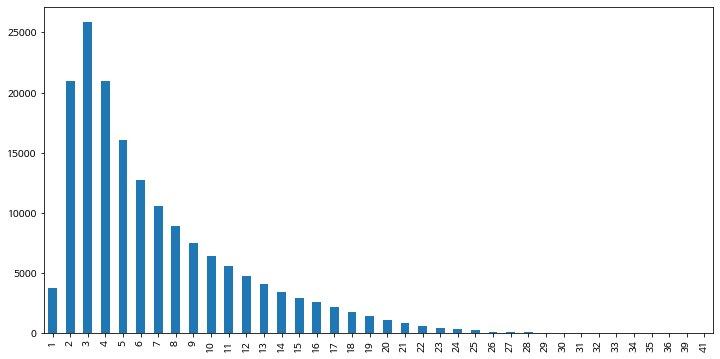

In [30]:
tokenized_df['reviews'].apply(lambda x: len(x.split())).value_counts().sort_index().plot(kind='bar', figsize=(12, 6));
tokenized_df['reviews'].apply(lambda x: len(x.split())).describe()

토큰화된 데이터 저장

In [ ]:
# import pickle

# path = ''

# with open(path+'/tokenized_naver_review.pkl', 'wb') as f:
#     pickle.dump(tokenized_df, f)

## 5.단어 정수 인코딩

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [32]:
MAX_NUM_WORD = 2000
MAX_WORD_LENGTH = 9

In [33]:
tokenizer = Tokenizer(MAX_NUM_WORD)
tokenizer.fit_on_texts(tokenized_df['reviews'])
len(tokenizer.word_index)

35829

해당 인덱스의 단어가 몇 번 등장하는지 확인

In [34]:
tokenizer.word_counts[tokenizer.index_word[2000]]

71

In [35]:
tokenizer.word_index

{'배송': 1,
 '구매': 2,
 '사용': 3,
 '제품': 4,
 '그냥': 5,
 '가격': 6,
 '좀': 7,
 '생각': 8,
 '주문': 9,
 '맛': 10,
 '더': 11,
 '때': 12,
 '것': 13,
 '별로': 14,
 '사이즈': 15,
 '개': 16,
 '포장': 17,
 '거': 18,
 '상품': 19,
 '부분': 20,
 '요': 21,
 '냄새': 22,
 '정말': 23,
 '하나': 24,
 '안': 25,
 '진짜': 26,
 '구입': 27,
 '조금': 28,
 '반품': 29,
 '아주': 30,
 '또': 31,
 '느낌': 32,
 '정도': 33,
 '아이': 34,
 '제': 35,
 '맘': 36,
 '완전': 37,
 '용': 38,
 '처음': 39,
 '저': 40,
 '다시': 41,
 '사진': 42,
 '디자인': 43,
 '비': 44,
 '상태': 45,
 '보고': 46,
 '한번': 47,
 '효과': 48,
 '다른': 49,
 '추천': 50,
 '걸': 51,
 '이': 52,
 '향': 53,
 '크기': 54,
 '선물': 55,
 '교환': 56,
 '색상': 57,
 '대비': 58,
 '해': 59,
 '계속': 60,
 '전': 61,
 '물건': 62,
 '바로': 63,
 '번': 64,
 '마음': 65,
 '다음': 66,
 '집': 67,
 '박스': 68,
 '듯': 69,
 '수': 70,
 '실망': 71,
 '돈': 72,
 '가성': 73,
 '설치': 74,
 '곳': 75,
 '후': 76,
 '택배': 77,
 '색': 78,
 '아기': 79,
 '이번': 80,
 '만족': 81,
 '불량': 82,
 '조립': 83,
 '옷': 84,
 '물': 85,
 '못': 86,
 '달': 87,
 '여기': 88,
 '항상': 89,
 '마감': 90,
 '확인': 91,
 '왜': 92,
 '일단': 93,
 '역시': 94,
 '뭐': 

In [36]:
X = tokenizer.texts_to_sequences(tokenized_df['reviews'])
X[:10]

[[116],
 [77, 251, 38, 67, 260, 1035, 129],
 [30, 232, 23, 16, 11, 2, 6, 465, 567, 28, 73, 44, 97],
 [55, 38, 1993, 19, 424, 63, 1, 746, 91, 25, 63, 55, 1967, 110, 1, 41, 8],
 [1457, 57, 340, 258, 18, 38, 1387, 3],
 [1020, 12, 37, 649, 334, 716, 8, 26, 14],
 [9, 1, 88, 406, 194, 147, 108, 75, 50],
 [122, 9, 25, 14],
 [60, 12, 178, 177],
 [672, 606, 904, 436, 59, 549, 293, 144, 358, 12, 12, 129]]

In [37]:
X = pad_sequences(X, maxlen=MAX_WORD_LENGTH, padding='post')
X[:10]

array([[ 116,    0,    0,    0,    0,    0,    0,    0,    0],
       [  77,  251,   38,   67,  260, 1035,  129,    0,    0],
       [  11,    2,    6,  465,  567,   28,   73,   44,   97],
       [  91,   25,   63,   55, 1967,  110,    1,   41,    8],
       [1457,   57,  340,  258,   18,   38, 1387,    3,    0],
       [1020,   12,   37,  649,  334,  716,    8,   26,   14],
       [   9,    1,   88,  406,  194,  147,  108,   75,   50],
       [ 122,    9,   25,   14,    0,    0,    0,    0,    0],
       [  60,   12,  178,  177,    0,    0,    0,    0,    0],
       [ 436,   59,  549,  293,  144,  358,   12,   12,  129]],
      dtype=int32)

In [38]:
X.shape

(165961, 9)

In [39]:
y = tokenized_df['ratings'].values
y

array([1, 0, 1, ..., 1, 1, 1])

In [40]:
y.shape

(165961,)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=826)

In [42]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(149364, 9) (149364,)
(16597, 9) (16597,)


## 6.RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NUM_WORD, 16, input_length=MAX_WORD_LENGTH))
model.add(SimpleRNN(32, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 9, 16)             32000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                1568      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 33,601
Trainable params: 33,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=3)]
)

Epoch 1/10
1051/1051 [==============================] - 18s 13ms/step - loss: 0.4806 - accuracy: 0.7621 - val_loss: 0.4497 - val_accuracy: 0.7861
Epoch 2/10
1051/1051 [==============================] - 13s 13ms/step - loss: 0.4427 - accuracy: 0.7901 - val_loss: 0.4524 - val_accuracy: 0.7871
Epoch 3/10
1051/1051 [==============================] - 13s 13ms/step - loss: 0.4337 - accuracy: 0.7952 - val_loss: 0.4510 - val_accuracy: 0.7853
Epoch 4/10
1051/1051 [==============================] - 14s 13ms/step - loss: 0.4256 - accuracy: 0.8000 - val_loss: 0.4551 - val_accuracy: 0.7836


In [ ]:
model.evaluate(X_test, y_test)

519/519 [==============================] - 1s 3ms/step - loss: 0.4612 - accuracy: 0.7783


[0.4612373113632202, 0.7782731652259827]

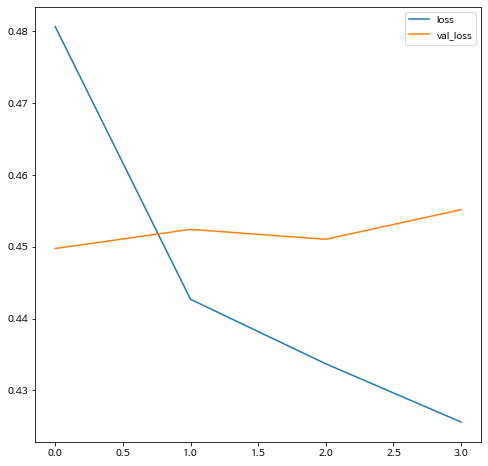

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

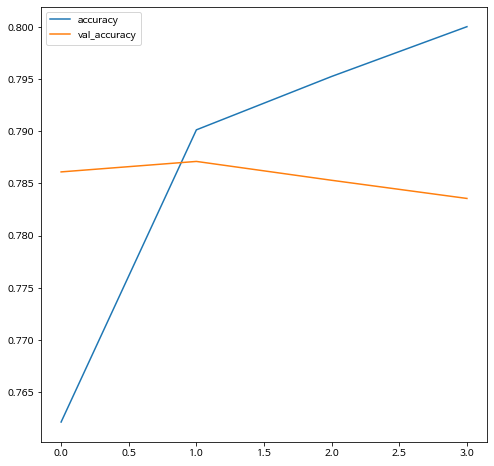

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.epoch, history.history['accuracy'], label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## 7.LSTM

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NUM_WORD, 16, input_length=MAX_WORD_LENGTH))
model.add(LSTM(32, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 9, 16)             32000     
_________________________________________________________________
lstm (LSTM)                  (None, 32)                6272      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 38,305
Trainable params: 38,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=3)]
)

Epoch 1/20
1051/1051 [==============================] - 12s 5ms/step - loss: 0.4795 - accuracy: 0.7616 - val_loss: 0.4469 - val_accuracy: 0.7858
Epoch 2/20
1051/1051 [==============================] - 5s 5ms/step - loss: 0.4411 - accuracy: 0.7890 - val_loss: 0.4458 - val_accuracy: 0.7872
Epoch 3/20
1051/1051 [==============================] - 5s 5ms/step - loss: 0.4356 - accuracy: 0.7924 - val_loss: 0.4371 - val_accuracy: 0.7900
Epoch 4/20
1051/1051 [==============================] - 5s 5ms/step - loss: 0.4300 - accuracy: 0.7950 - val_loss: 0.4379 - val_accuracy: 0.7902
Epoch 5/20
1051/1051 [==============================] - 5s 5ms/step - loss: 0.4254 - accuracy: 0.7984 - val_loss: 0.4421 - val_accuracy: 0.7828
Epoch 6/20
1051/1051 [==============================] - 5s 5ms/step - loss: 0.4226 - accuracy: 0.8001 - val_loss: 0.4394 - val_accuracy: 0.7909


In [ ]:
model.evaluate(X_test, y_test)

519/519 [==============================] - 1s 2ms/step - loss: 0.4494 - accuracy: 0.7848


[0.44941458106040955, 0.7847803831100464]

## 7.GRU

In [ ]:
from tensorflow.keras.layers import GRU

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NUM_WORD, 16, input_length=MAX_WORD_LENGTH))
model.add(GRU(32, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 9, 16)             32000     
_________________________________________________________________
gru (GRU)                    (None, 32)                4800      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 36,833
Trainable params: 36,833
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.1,
    callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=3)]
)

Epoch 1/20
1051/1051 [==============================] - 8s 6ms/step - loss: 0.4769 - accuracy: 0.7608 - val_loss: 0.4485 - val_accuracy: 0.7792
Epoch 2/20
1051/1051 [==============================] - 5s 5ms/step - loss: 0.4415 - accuracy: 0.7892 - val_loss: 0.4421 - val_accuracy: 0.7865
Epoch 3/20
1051/1051 [==============================] - 5s 5ms/step - loss: 0.4372 - accuracy: 0.7914 - val_loss: 0.4399 - val_accuracy: 0.7891
Epoch 4/20
1051/1051 [==============================] - 5s 5ms/step - loss: 0.4326 - accuracy: 0.7934 - val_loss: 0.4389 - val_accuracy: 0.7880
Epoch 5/20
1051/1051 [==============================] - 5s 5ms/step - loss: 0.4274 - accuracy: 0.7966 - val_loss: 0.4371 - val_accuracy: 0.7911
Epoch 6/20
1051/1051 [==============================] - 5s 5ms/step - loss: 0.4238 - accuracy: 0.7985 - val_loss: 0.4366 - val_accuracy: 0.7929
Epoch 7/20
1051/1051 [==============================] - 5s 5ms/step - loss: 0.4206 - accuracy: 0.7997 - val_loss: 0.4386 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test)

519/519 [==============================] - 1s 2ms/step - loss: 0.4509 - accuracy: 0.7868


[0.45093855261802673, 0.7867686748504639]

ㅠㅠ paramter 값들을 바꾸면 성능이 좋아질지도?!

## 8.형태소로 토큰화

형태소란?

: 의미를 가지는 요소로서는 더 이상 분석할 수 없는 가장 작은 말의 단위

In [ ]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
okt = Okt()
tokenized_morph = []

for review in tqdm(naver_review_df['reviews']):
    tokenized = okt.morphs(review, stem=True)
    tokenized = [data for data in tokenized if data not in stopwords]
    tokenized_morph.append(" ".join(tokenized))

100%|██████████| 199898/199898 [11:40<00:00, 285.35it/s]


In [43]:
with open('/content/gdrive/MyDrive/Ulsan_univ/dohee/shared/배포자료_리뷰분류/data/naver_morph.pkl', 'rb') as f:
    tokenized_morph = pickle.load(f)

In [44]:
tokenized_df = pd.DataFrame(data={'reviews': tokenized_morph, 'ratings': naver_review_df['ratings']})
tokenized_df.reset_index(drop=True, inplace=True)
tokenized_df

,reviews,ratings
0,배공 빠르다 굿,1
1,택배 엉망 이네 용 저희 집 밑 층 말 없이 놔두다,0
2,아주 좋다 바지 정말 좋다 2 개 더 구매 하다 가격 대박 이다 . 바느질 조금 엉...,1
3,선물 용 으로 빨리 받다 전달 하다 하다 상품 이다 머그컵 만 오다 당황 하다 . ...,0
4,민트 색상 예쁘다 . 옆 손잡이 거 용 도로 사용 되다 ㅎㅎ,1
...,...,...
199893,장마 라 그 런가 !!! 달 않다,0
199894,다이슨 케이스 구매 하다 다이슨 슈퍼소닉 드라이기 케이스 구매 하다 가격 괜찮다 배...,1
199895,로드샾 에서 살다 세배 저렴하다 ㅜㅜ 자주 용하다,1
199896,넘다 이쁘다 쎄다 되다 보이다 ~,1


### 중복제거

In [ ]:
tokenized_df[tokenized_df.duplicated()]

,reviews,ratings
3926,배송 빨르다 좋다,1
4661,비추다 이다,0
5810,한진택배 배송 너무 느리다,0
7524,배송 빠르다,0
10074,배송 빠르다 감사하다,1
...,...,...
198731,저희 집 창문 이랑은 사이즈 안 맞다,0
198767,배송 빨 라서 좋다,1
198865,가슴 부위 너무 파이다 길이 너무 짧다,0
199037,버리다,0


In [ ]:
tokenized_df[tokenized_df.duplicated(subset=['reviews'])]

,reviews,ratings
3926,배송 빨르다 좋다,1
4661,비추다 이다,0
5810,한진택배 배송 너무 느리다,0
7524,배송 빠르다,0
10074,배송 빠르다 감사하다,1
...,...,...
198767,배송 빨 라서 좋다,1
198865,가슴 부위 너무 파이다 길이 너무 짧다,0
199037,버리다,0
199125,냄새 많이 나다 .,0


In [ ]:
tokenized_df.drop_duplicates(subset=['reviews'], inplace=True, ignore_index=True)
tokenized_df

,reviews,ratings
0,배공 빠르다 굿,1
1,택배 엉망 이네 용 저희 집 밑 층 말 없이 놔두다,0
2,아주 좋다 바지 정말 좋다 2 개 더 구매 하다 가격 대박 이다 . 바느질 조금 엉...,1
3,선물 용 으로 빨리 받다 전달 하다 하다 상품 이다 머그컵 만 오다 당황 하다 . ...,0
4,민트 색상 예쁘다 . 옆 손잡이 거 용 도로 사용 되다 ㅎㅎ,1
...,...,...
198889,장마 라 그 런가 !!! 달 않다,0
198890,다이슨 케이스 구매 하다 다이슨 슈퍼소닉 드라이기 케이스 구매 하다 가격 괜찮다 배...,1
198891,로드샾 에서 살다 세배 저렴하다 ㅜㅜ 자주 용하다,1
198892,넘다 이쁘다 쎄다 되다 보이다 ~,1


In [ ]:
tokenized_df[tokenized_df.duplicated()]

,reviews,ratings


### 비어있는 review 제거

In [ ]:
tokenized_df.query('reviews == ""')

,reviews,ratings


In [ ]:
empty_index = list(tokenized_df.query('reviews == ""').index)
tokenized_df.drop(empty_index, inplace=True)
tokenized_df.reset_index(drop=True, inplace=True)
tokenized_df

,reviews,ratings
0,배공 빠르다 굿,1
1,택배 엉망 이네 용 저희 집 밑 층 말 없이 놔두다,0
2,아주 좋다 바지 정말 좋다 2 개 더 구매 하다 가격 대박 이다 . 바느질 조금 엉...,1
3,선물 용 으로 빨리 받다 전달 하다 하다 상품 이다 머그컵 만 오다 당황 하다 . ...,0
4,민트 색상 예쁘다 . 옆 손잡이 거 용 도로 사용 되다 ㅎㅎ,1
...,...,...
198889,장마 라 그 런가 !!! 달 않다,0
198890,다이슨 케이스 구매 하다 다이슨 슈퍼소닉 드라이기 케이스 구매 하다 가격 괜찮다 배...,1
198891,로드샾 에서 살다 세배 저렴하다 ㅜㅜ 자주 용하다,1
198892,넘다 이쁘다 쎄다 되다 보이다 ~,1


count    198894.000000
mean         13.674435
std           9.982757
min           1.000000
25%           6.000000
50%          10.000000
75%          19.000000
max          77.000000
Name: reviews, dtype: float64

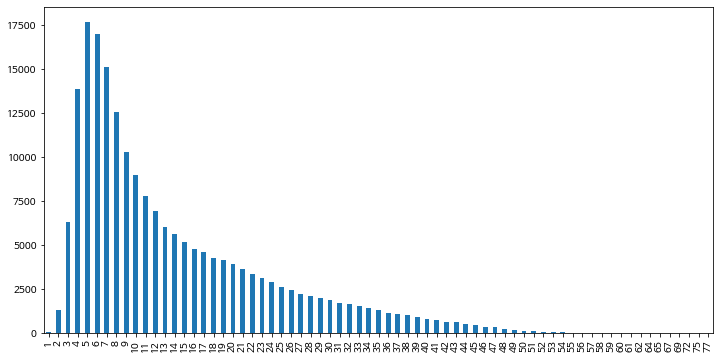

In [ ]:
tokenized_df['reviews'].apply(lambda x: len(x.split())).value_counts().sort_index().plot(kind='bar', figsize=(12, 6));
tokenized_df['reviews'].apply(lambda x: len(x.split())).describe()

## 5.단어 정수 인코딩

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
MAX_NUM_WORD = 2000
MAX_WORD_LENGTH = 19

In [ ]:
tokenizer = Tokenizer(MAX_NUM_WORD)
tokenizer.fit_on_texts(tokenized_df['reviews'])
len(tokenizer.word_index)

45160

In [ ]:
X = tokenizer.texts_to_sequences(tokenized_df['reviews'])
X[:5]

[[27, 261],
 [201, 524, 150, 115, 554, 181, 542, 1720, 314, 161, 1478],
 [83,
  2,
  497,
  67,
  2,
  99,
  48,
  36,
  14,
  1,
  28,
  867,
  16,
  1041,
  91,
  727,
  1125,
  343,
  53,
  173,
  122,
  238,
  169],
 [130,
  115,
  23,
  280,
  31,
  1,
  1,
  60,
  16,
  41,
  18,
  819,
  1,
  1018,
  178,
  121,
  1,
  4,
  1311,
  89,
  235,
  10,
  35,
  178,
  130,
  1,
  271,
  1458,
  284,
  4,
  212,
  157,
  249,
  126,
  29,
  1,
  7,
  97],
 [143, 76, 670, 532, 59, 115, 19, 20, 81]]

In [ ]:
X = pad_sequences(X, maxlen=MAX_WORD_LENGTH, padding='post')
X

array([[  27,  261,    0, ...,    0,    0,    0],
       [ 201,  524,  150, ...,    0,    0,    0],
       [   2,   99,   48, ...,  122,  238,  169],
       ...,
       [  49,  249,   63, ...,    0,    0,    0],
       [  65,   64, 1595, ...,    0,    0,    0],
       [ 104,   19,  151, ...,    0,    0,    0]], dtype=int32)

In [ ]:
X.shape

(198894, 19)

In [ ]:
y = tokenized_df['ratings'].values
y

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=826)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(179004, 19) (179004,)
(19890, 19) (19890,)


## 9.형태소토큰화_RNN

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NUM_WORD, 16, input_length=MAX_WORD_LENGTH))
model.add(SimpleRNN(32, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 19, 16)            32000     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                1568      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 33,601
Trainable params: 33,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    callbacks=[EarlyStoppingas(monitor='val_loss', min_delta=0.0001, patience=3)]
)

Epoch 1/10
1259/1259 [==============================] - 33s 25ms/step - loss: 0.3270 - accuracy: 0.8666 - val_loss: 0.2839 - val_accuracy: 0.8886
Epoch 2/10
1259/1259 [==============================] - 30s 24ms/step - loss: 0.2806 - accuracy: 0.8913 - val_loss: 0.2766 - val_accuracy: 0.8934
Epoch 3/10
1259/1259 [==============================] - 30s 24ms/step - loss: 0.2702 - accuracy: 0.8948 - val_loss: 0.2726 - val_accuracy: 0.8925
Epoch 4/10
1259/1259 [==============================] - 30s 24ms/step - loss: 0.2623 - accuracy: 0.8980 - val_loss: 0.2755 - val_accuracy: 0.8926
Epoch 5/10
1259/1259 [==============================] - 29s 23ms/step - loss: 0.2561 - accuracy: 0.9001 - val_loss: 0.2795 - val_accuracy: 0.8882
Epoch 6/10
1259/1259 [==============================] - 31s 24ms/step - loss: 0.2505 - accuracy: 0.9026 - val_loss: 0.2737 - val_accuracy: 0.8931


In [ ]:
model.evaluate(X_test, y_test)

622/622 [==============================] - 2s 3ms/step - loss: 0.2693 - accuracy: 0.8972


[0.26930221915245056, 0.8971844911575317]

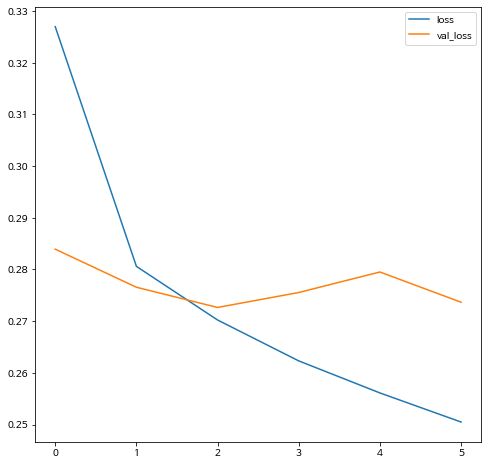

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.epoch, history.history['loss'], label='loss')
plt.plot(history.epoch, history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

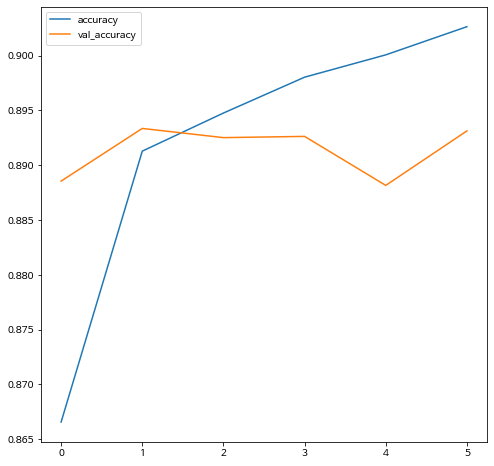

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.epoch, history.history['accuracy'], label='accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## 10.모델 저장하기

In [ ]:
# path = '/content/gdrive/MyDrive/Ulsan_univ/model/'
# model.save(path+'RNN_morph_batch16_epoch10.h5')

## 11.질문!